<a href="https://colab.research.google.com/github/MrNoby47/Deep_learning/blob/main/Lenet_convolutional_netwok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
import requests
import cv2
from PIL import Image
from keras.layers import Dropout

In [2]:
(X_train,y_train),(X_test,y_test) =  mnist.load_data()


In [3]:
assert(X_train.shape[0] == y_train.shape[0]), "Number of images is different from number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "Number of images is different from number of labels"
assert(X_train.shape[1:] == (28,28)), "Image size different to 28x28"
assert(X_train.shape[1:] == (28,28)), "Image size different to 28x28"

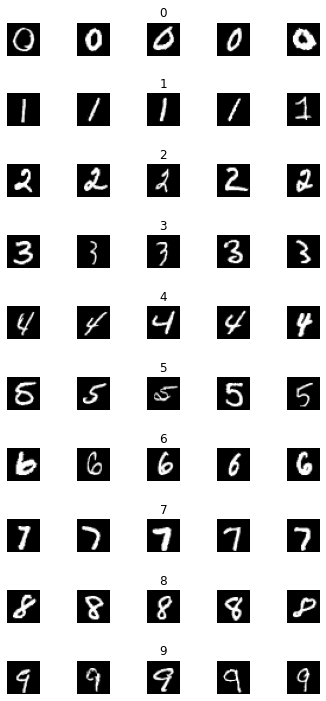

In [4]:
num_sample = []
n_classes = 10
cols = 5
fig,axs = plt.subplots(nrows=n_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(n_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected) - 1),:,:],cmap =plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_sample.append(len(x_selected))

Text(0, 0.5, 'Number of images')

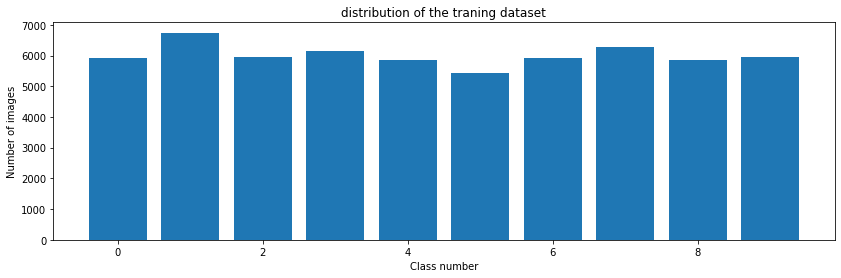

In [5]:
#plot our distribution dataset
plt.figure(figsize=(14,4))
plt.bar(range(0, n_classes), num_sample )
plt.title("distribution of the traning dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [6]:
#Now let's prepare our data for the future Network

#One hot encoding with to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)

#Normalization for the input layer
 
X_train = X_train/255
X_test = X_test/255

#reshape images size for weights matrix

num_pixels = 784 #28*28 = 784
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test =X_test.reshape(X_test.shape[0], 28,28,1)

In [7]:
#define the LeNet model

def Lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size =(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [8]:
model = Lenet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
h = model.fit(X_train,y_train, verbose=1, validation_split=0.1,batch_size=400,epochs=10, shuffle=1)

Epoch 1/10
135/135 [==============================] - 3s 8ms/step - loss: 0.2083 - accuracy: 0.9336 - val_loss: 0.0503 - val_accuracy: 0.9843
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0664 - accuracy: 0.9799 - val_loss: 0.0414 - val_accuracy: 0.9868
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0388 - val_accuracy: 0.9897
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0412 - val_accuracy: 0.9903
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0394 - accuracy: 0.9882 - val_loss: 0.0348 - val_accuracy: 0.9905
Epoch 

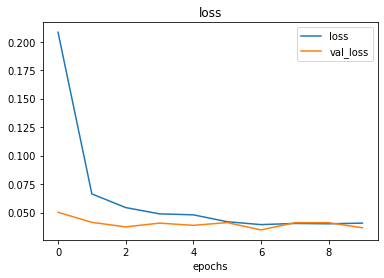

In [10]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['loss','val_loss'])

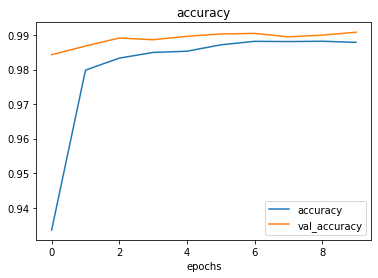

In [11]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','val_accuracy'])

In [12]:
#final test evaluation 
score = model.evaluate(X_test, y_test, verbose=0)
print("Test score :", score[0])
print("Test accuracy :", score[1])

Test score : 0.03449534624814987
Test accuracy : 0.9904999732971191


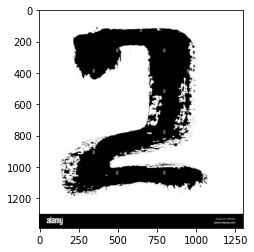

In [13]:
url = "https://c8.alamy.com/comp/HWF0K0/2-black-ink-numbers-over-the-white-background-HWF0K0.jpg"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

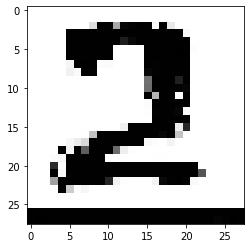

In [14]:
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale,cmap = plt.get_cmap('gray'))

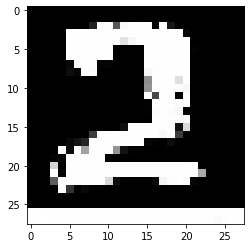

In [15]:
image = cv2.bitwise_not(gray_scale)
#print(image)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [16]:
image = image/255
image = image.reshape(1,28,28,1)

#finally make a prediction
x= model.predict(image)
prediction = np.argmax(x,axis=1)
print("prediction :", prediction)

1/1 [==============================] - 0s 202ms/step
prediction : [2]
